<a href="https://colab.research.google.com/github/DDUM1N/DDUM1N/blob/main/5%EB%B2%88%EC%A7%B8%20%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5번째 과제, 통계_coding연습(5주차).pdf 연습하기
## 1. 주사위를 10,000번 던지는 실험을 통해 짝수 눈금이 나올 확률 계산

In [83]:
# 필요한 라이브러리 임포트
import random

# 시뮬레이션을 위한 변수 초기화
trials = 10000
even_rolls_count = 0

# 10,000번의 주사위 던지기 시뮬레이션
for _ in range(trials):
  roll = random.randint(1, 6) # 1부터 6까지 무작위 수(주사위눈금)
  if roll % 2 == 0: # 짝수 눈금 확인
    even_rolls_count += 1 # 짝수 눈금이 나오면 카운트 증가

# 짝수 눈금이 나올 확률 계산
probability_even = even_rolls_count/trials

probability_even

0.4969

- 이론 확률 = 3/6 = 0.5
- 실험 결과 ≈ 0.497 → 시행 횟수가 많아질수록 0.5에 근접함 확인

## 2. 합집합, 교집합, 여집합

In [31]:
# 사건의 연산 구현 예시 : 주사위 던지기
# 사건 A : 주사위의눈금이2 이하인사건
# 사건 B : 주사위의눈금이홀수인사건
# 표본공간 S와 사건 A, B 정의
S = {1, 2, 3, 4, 5, 6}
A = {1, 2}
B = {1, 3, 5}
# 합집합 : A ∪ B
union_AB = A.union(B)
# 교집합 : A ∩ B
intersection_AB = A.intersection(B)
# 여집합 : A'(A의 여집합)
complement_A = S.difference(A)
# 여집합 : B'(B의 여집합)
complement_B = S.difference(B)
union_AB, intersection_AB, complement_A, complement_B

({1, 2, 3, 5}, {1}, {3, 4, 5, 6}, {2, 4, 6})

- 합집합: A ∪ B = {1,2,3,5}
- 교집합: A ∩ B = {1}
- 여집합: A′ = {3,4,5,6}, B′ = {2,4,6}
- 집합 연산을 코드로 확인 가능

## 3. 고전적 확률 계산 예시 : 뽑기 상자에서 특정 색의 공이 나올 확률

In [32]:
# 각 색의 공의 개수
red_balls = 2
blue_balls = 3
green_balls = 5

# 특정 색(빨간색) 공이 나올 경우의 수
favorable_outcomes = red_balls

# 상자 안의 모든 가능한 결과의 수
total_outcomes = red_balls + blue_balls + green_balls

# 특정 색(빨간색) 공이 나올 확률 계산
probability = favorable_outcomes / total_outcomes

probability

0.2

이론 확률과 코드 결과 일치 → 고전적 확률 계산 방식 복습됨

## 4. 주사위를 1,000회 던져 4가 나오는 확률 시뮬레이션

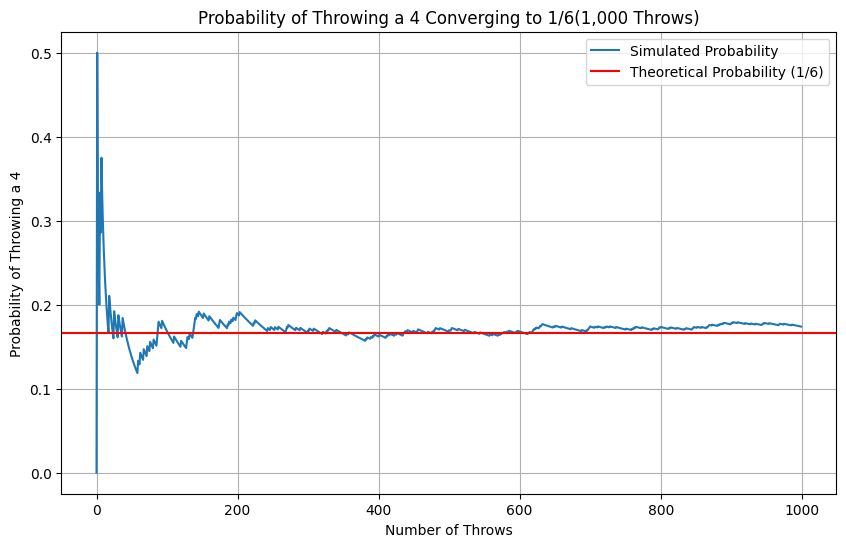

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# 주사위 던지기 시뮬레이션 횟수 조정: 1,000회
n_throws_short = 1000
# 주사위 던지기 결과 생성(1~6 사이의 무작위 정수, 1,000회)
throws_short = np.random.randint(1, 7, size=n_throws_short)
# 4가 나온 횟수를 기록할 배열(1,000회)
fours_count_short = np.zeros(n_throws_short)
# 각 던지기마다 4가 나온 횟수를 업데이트(1,000회)
for i in range(1, n_throws_short):
  fours_count_short[i] = fours_count_short[i-1] + (throws_short[i] == 4)
# 각 시점에서의 확률 계산(1,000회)
probabilities_short = fours_count_short / np.arange(1,
n_throws_short + 1)
# 결과 그래프로 표시(1,000회)
plt.figure(figsize=(10, 6))
plt.plot(probabilities_short, label='Simulated Probability')
plt.axhline(y=1/6, color='r', linestyle='-', label='Theoretical Probability (1/6)')
plt.xlabel('Number of Throws')
plt.ylabel('Probability of Throwing a 4')
plt.title('Probability of Throwing a 4 Converging to 1/6(1,000 Throws)')
plt.legend()
plt.grid(True)
plt.show()

- 그래프에서 확률이 점점 1/6 (≈0.1667)으로 수렴
- 작은 시행에서는 변동이 크지만, 반복 횟수가 늘수록 안정적으로 1/6에 가까워짐


## 5. 주머니 속 빨간색 공 3개와 파란색 공 4개에서 복원
## - 추출을 여러 번 반복하여 빨간색 공을 뽑는 실험적 확률

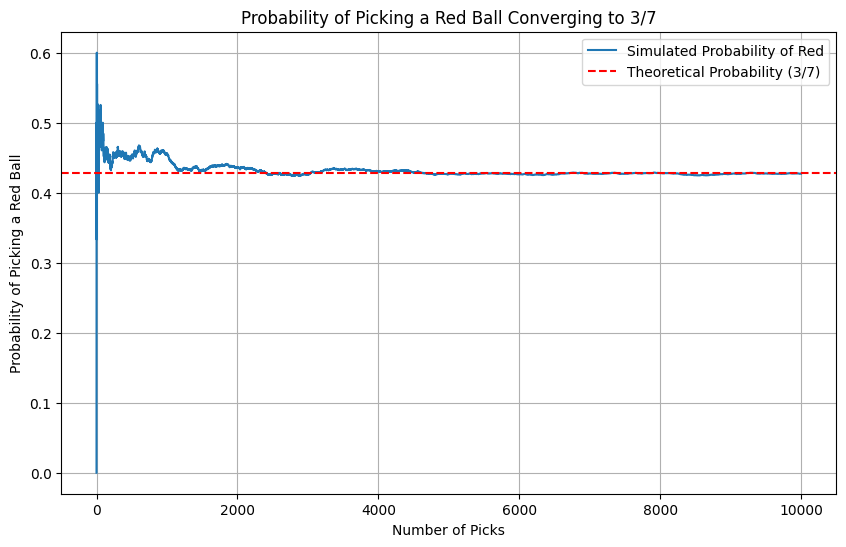

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# 주머니 안의 공 정의
bag = ['R'] * 3 + ['B'] * 4 # 3 빨간색, 4 파란색
# 시뮬레이션 횟수
n_picks = 10000
# 복원 추출 시뮬레이션
picks = np.random.choice(bag, size=n_picks, replace=True)
# 각 뽑기마다 빨간색 공을 뽑은 누적 횟수를 기록할 배열
red_count_cumulative = np.cumsum(picks == 'R')
# 각 시점에서의 실험적 확률 계산
probabilities_red_cumulative = red_count_cumulative / np.arange(1, n_picks + 1)
# 결과 그래프로 표시
plt.figure(figsize=(10, 6))
plt.plot(probabilities_red_cumulative, label='Simulated Probability of Red')
plt.axhline(y=3/7, color='r', linestyle='--', label='Theoretical Probability (3/7)')
plt.xlabel('Number of Picks')
plt.ylabel('Probability of Picking a Red Ball')
plt.title('Probability of Picking a Red Ball Converging to 3/7')
plt.legend()
plt.grid(True)
plt.show()

- 그래프에서 확률이 시행이 많아질수록 3/7 ≈ 0.4286로 수렴
- 시행 초반에는 요동이 심하지만, 횟수가 커질수록 이론적 확률에 근접
- 대수의 법칙(Law of Large Numbers) 확인 가능